In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/Agricultural Dataset.csv'
data = pd.read_csv(file_path)

# Select relevant columns for the study
relevant_columns = [
    'avg_rainfall', 'urea', 'wheat',
    'Noncalcareous Brown Floodplain Soil', 'Shallow Red-Brown Terrace Soil',
    'Deep Red-Brown Terrace Soil', 'Brown Mottled Terrace Soil',
    'Shallow Grey Terrace Soil', 'Deep Grey Terrace Soil', 'Grey Valley Soil',
    'Brown Hill Soil', 'Grey Piedmont Soil', 'soil moisture'
]
data = data[relevant_columns]

# Drop rows with missing target values (wheat yield)
data = data.dropna(subset=['wheat'])

# Fill missing values for other columns with the mean value
data.fillna(data.mean(), inplace=True)

# Split the dataset into features and target variable
X = data.drop(columns=['wheat'])
y = data['wheat']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")



Mean Squared Error: 2474403.3495571422
R-Squared: 0.9256246249309421


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Print the results
for name, metrics in results.items():
    print(f"{name} - Mean Squared Error: {metrics['MSE']}, R-Squared: {metrics['R2']}")


Linear Regression - Mean Squared Error: 3475492.4194475496, R-Squared: 0.8955339870953769
Decision Tree - Mean Squared Error: 3465851.3571428573, R-Squared: 0.8958237772078514
Random Forest - Mean Squared Error: 2474403.3495571422, R-Squared: 0.9256246249309421
Gradient Boosting - Mean Squared Error: 2620243.606390341, R-Squared: 0.9212409726844002
XGBoost - Mean Squared Error: 3157263.5590766245, R-Squared: 0.9050992792099881
K-Nearest Neighbors - Mean Squared Error: 2746560.031428572, R-Squared: 0.9174441658738686


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


AttributeError: 'KNeighborsRegressor' object has no attribute 'feature_importances_'

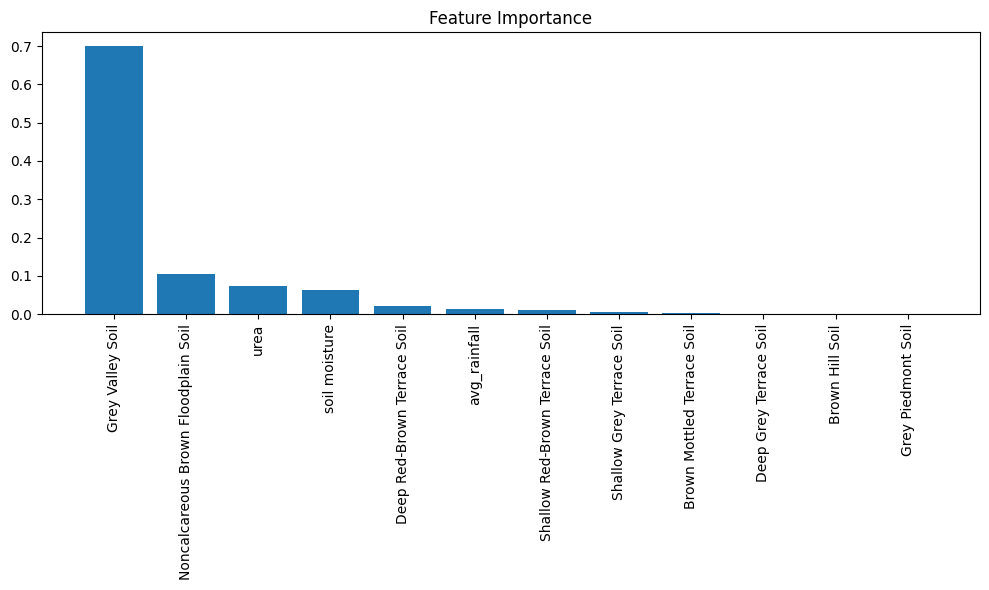

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy

# Assuming 'rf_model' is your trained RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Reinitialize RandomForestRegressor
rf_model.fit(X_train, y_train) # Refit the model

# Feature Importance
importances = rf_model.feature_importances_ # Use the RandomForestRegressor for feature importances
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

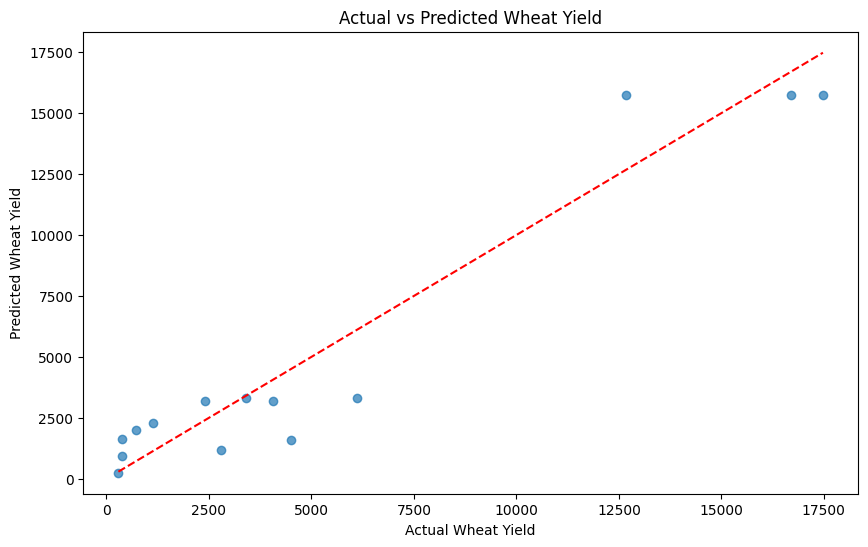

In [5]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Wheat Yield')
plt.ylabel('Predicted Wheat Yield')
plt.title('Actual vs Predicted Wheat Yield')
plt.show()


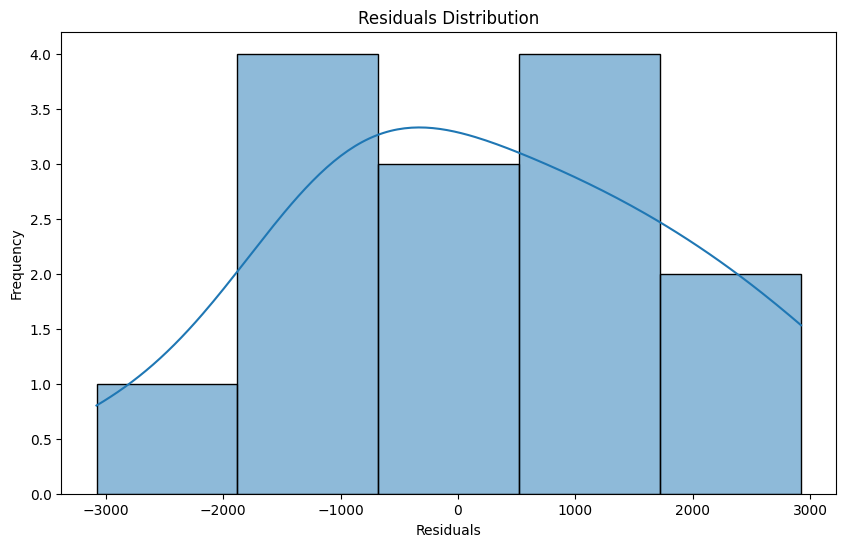

In [6]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()
